In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from parse_jfl import * 
from sag_calculator import *

In [2]:
lens_design = {
    'Thickness': 0.2,
    'SemiDiameter': 5.61+1,
}

In [3]:
front_surface_design = [
    {
        'Type': 'Start',
        'SemiDiameter': 0.0,
        'EndZ': 0.0,
    },

    {
        'Type': "Standard",
        'Radius': 849.15,
        'Conic': 0.0,
        'SemiDiameter': 1.844,
    },
    {
        'Type': "OffsetCircle",
        'Radius': 0.80,
        'Conic': 0.0,
        'SemiDiameter': 2.282,
        'Center': 1.844,
    },
    {
        'Type': "Line",
        'SemiDiameter': 4.060,
        'EndZ': 1.305,
    },
    {
        'Type': "OffsetCircle",
        'Radius': -0.80,
        'Conic': 0.0,
        'SemiDiameter': 4.50,
        'Center': 4.50
    },
    {
        'Type': "Line",
        'SemiDiameter': 5.61-lens_design['Thickness']/2,
        'EndZ': 1.437,
    },
    {
        'Type': "OffsetCircle",
        'Radius': lens_design['Thickness']/2,
        'Conic': 0.0,
        'SemiDiameter': 5.61,
        'Center': 5.61-lens_design['Thickness']/2
    },
    {
        'Type': "OffsetCircle",
        'Radius': -1,
        'Conic': 0.0,
        'SemiDiameter': 5.61+1,
        'Center': 5.61+1
    },
]

In [4]:
back_surface_design = [
    {
        'Type': 'Start',
        'SemiDiameter': 0.0,
        'EndZ': lens_design['Thickness'],
    },

    {
        'Type': 'EvenAsphere',
        'Radius': 5.286,
        'Conic': 0.684,
        'SemiDiameter': 2.088,
        'AsphereTerm': 3,
        'AsphereParams': [3.85479E-07,-1.12063E-06,-6.277E-07],
    },
    {
        "Type": "Line",
        "SemiDiameter": 4.101,
        "EndZ": 1.363+lens_design['Thickness'],
    },
    {
        'Type': "OffsetCircle",
        'Radius': -0.80,
        'Conic': 0.0,
        'SemiDiameter': 4.436,
        'Center': 4.436,
    },
    {
        "Type": "Line",
        "SemiDiameter": lens_design['SemiDiameter'],
        "EndZ": 1.437+lens_design['Thickness'],
    },
]
edge_design = [
     {
        'Type': 'Start',
        'SemiDiameter': 5.61-lens_design['Thickness']/2,
        'EndZ': 1.437+lens_design['Thickness'],
    },
    {
        'Type': "OffsetCircle",
        'Radius': -lens_design['Thickness']/2,
        'Conic': 0.0,
        'SemiDiameter': 5.61,
        'Center': 5.61-lens_design['Thickness']/2
    },
    {
        'Type': "OffsetCircle",
        'Radius': 1,
        'Conic': 0.0,
        'SemiDiameter': 5.61+1,
        'Center': 5.61+1
    },

]

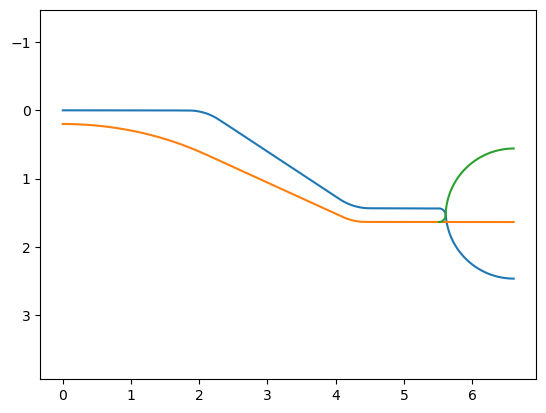

In [10]:
step = 0.0025
surface_list = [front_surface_design, back_surface_design, edge_design]
surface_sag = [{} for i in range(len(surface_list))]

for i, surface_design in enumerate(surface_list):
    
    r0 = surface_design[0]['SemiDiameter']
    z0 = surface_design[0]['EndZ']
    r = np.arange(r0, lens_design['SemiDiameter'], step)
    z = np.zeros_like(r)
    
    z[0] = z0
    for surface in surface_design[1:]:
        ROI_index = (r > r0) & (r <= surface['SemiDiameter'])
        r_ROI = r[ROI_index]
        try:
            func = TYPE_TO_FUNCTION[surface['Type']]
            z_ROI = func(r_ROI, surface, z0)
            # if surface['Type'] == 'Standard':
            #     z_ROI = standard(r_ROI, surface, z0)  
            # elif surface['Type'] == 'EvenAsphere':
            #     z_ROI = even_asphere(r_ROI, surface, z0)
            # elif surface['Type'] == 'Line':
            #     z_ROI = line(r_ROI, surface, z0)
            # elif surface['Type'] == 'OffsetCircle':
            #     z_ROI = offset_circle(r_ROI, surface, z0)
            z[ROI_index] = z_ROI
            z0 = z_ROI[-1]
        except :
            print('Error')
            break
        r0 = surface['SemiDiameter']
    surface_sag[i]['r'] = r
    surface_sag[i]['z'] = z
    plt.plot(r, z)
plt.axis('equal')
# 反转坐标轴
plt.gca().invert_yaxis()
plt.show()


In [11]:
segments={
    'F_XZ':np.vstack([surface_sag[0]['r'][::-1],surface_sag[0]['z'][::-1]]).T,
    'B_XZ':np.vstack([surface_sag[1]['r'][::-1],surface_sag[1]['z'][::-1]]).T,
    'E_XZ':np.vstack([surface_sag[2]['r'],surface_sag[2]['z']]).T,
}

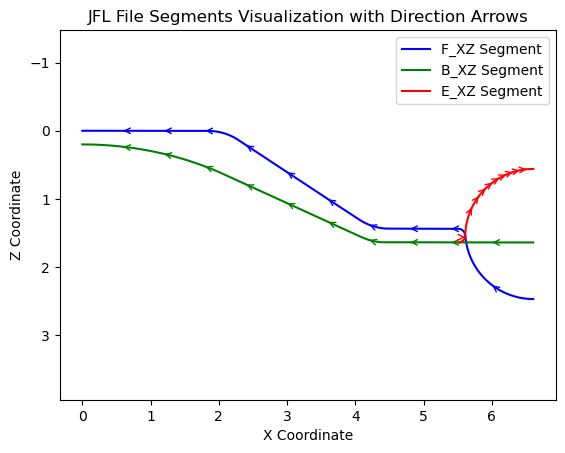

In [12]:
fig = plot_jfl_segments_with_arrows(segments)
plt.axis('equal')
plt.show()

In [13]:
import time 
time_stamp=time.strftime("%m%d%H", time.localtime())
jfl_filename=f'ICL_{time_stamp}.JFL'
jfl_string=build_jfl_string(segments)
with open(jfl_filename,'w') as f:
    f.write(jfl_string)
print(f'New JFL file {jfl_filename} has been saved.')

New JFL file ICL_091115.JFL has been saved.
